# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

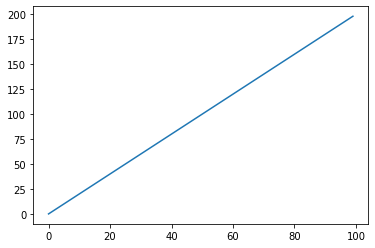

In [3]:
# Method 1
plt.plot(x,y)
plt.show()

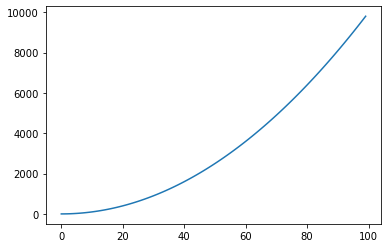

In [4]:
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

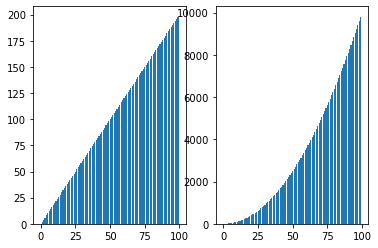

In [5]:
# Method 2
plot_options, (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2)
chart_1.bar(x,y)
chart_2.bar(x,z)

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

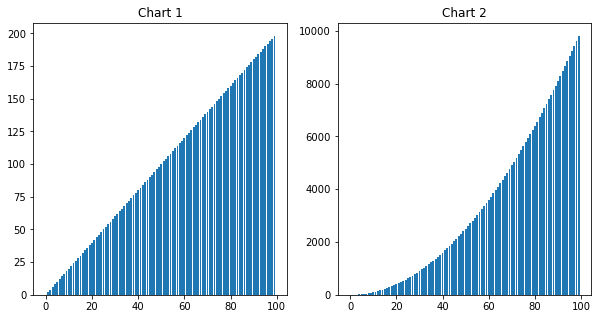

In [6]:
plot_options, (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
chart_1.bar(x,y)
chart_1.set_title('Chart 1')
chart_2.bar(x,z)
chart_2.set_title('Chart 2')
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

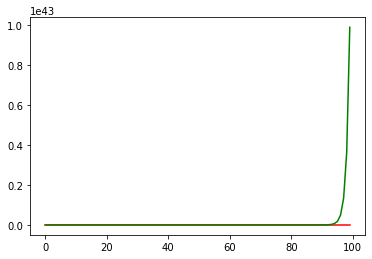

In [7]:
y1 = x**2
y2 = np.exp(x)

plt.plot( y1, color= 'r')
plt.plot( y2, color= 'g') 

#plt.yscale('log')
plt.show()

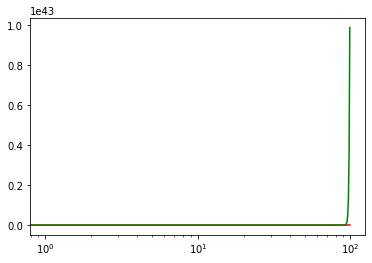

In [8]:
plt.plot( y1, color= 'r')
plt.plot( y2, color= 'g') 
plt.xscale('log')
plt.show()

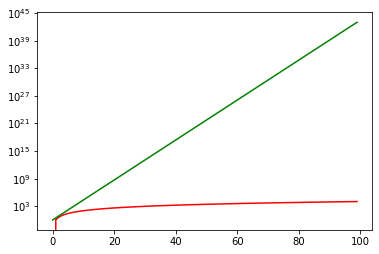

In [9]:
plt.plot( y1, color= 'r')
plt.plot( y2, color= 'g') 
plt.yscale('log')
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

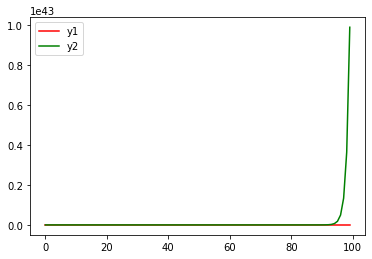

In [10]:
plt.plot( y1, color= 'r', label= 'y1')
plt.plot( y2, color= 'g', label= 'y2')
plt.legend()
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [11]:
import pandas as pd

fitbit = pd.read_csv('Fitbit2.csv')
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

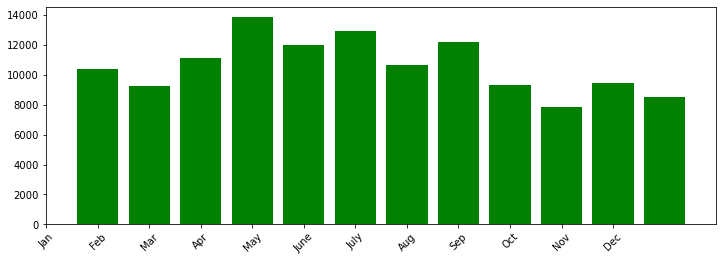

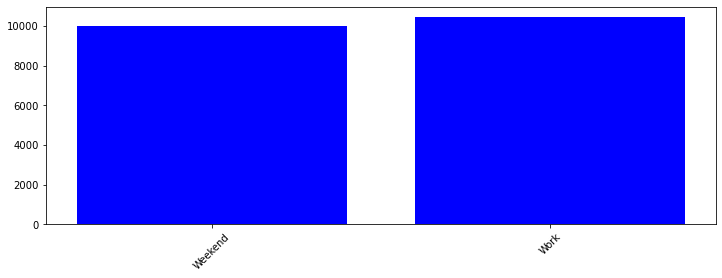

In [12]:
# MEDIAN STEPS BY MONTH_ENCODED
fitbit_steps_month = fitbit.groupby(['Months_encoded']).agg({'Steps': 'median'})
fitbit_steps_month = pd.DataFrame(fitbit_steps_month).reset_index()

plt.figure(figsize= (12,4))
plt.bar(fitbit_steps_month['Months_encoded'], fitbit_steps_month['Steps'], color='g')
plt.xticks(fitbit_steps_month.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.savefig('/Users/giusa/tamy aulas/lab-matplotlib-seaborn/figures/fitbit_steps_month.png', dpi = 300)
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND
fitbit_steps_work = fitbit.groupby(['Work_or_Weekend']).agg({'Steps': 'median'})
fitbit_steps_work = pd.DataFrame(fitbit_steps_work).reset_index()
plt.figure(figsize= (12,4))
plt.bar(fitbit_steps_work['Work_or_Weekend'], fitbit_steps_work['Steps'], color='b')
plt.xticks([0,1], ['Weekend', 'Work'], rotation=45)
plt.savefig('/Users/giusa/tamy aulas/lab-matplotlib-seaborn/figures/fitbit_steps_work.png', dpi = 300)
plt.show()


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

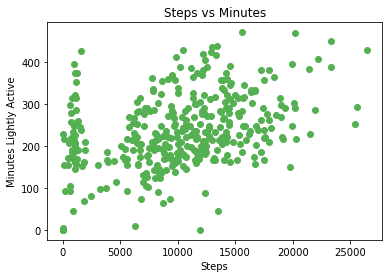

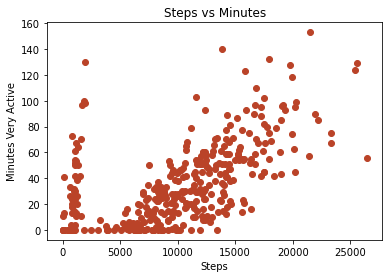

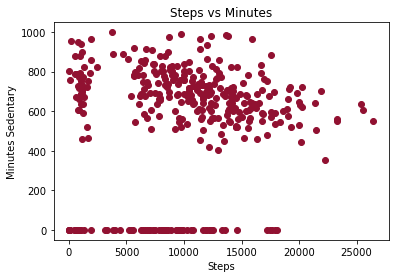

In [13]:
cols = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary' ]

for col in cols:
    plt.figure()
    plt.title('Steps vs Minutes')
    plt.xlabel('Steps')
    plt.ylabel(col)
    plt.scatter(fitbit['Steps'], fitbit[col], color=np.random.rand(3,))
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [136]:
titanic= pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [15]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [16]:
# NUMERICAL VARIABLES
titanic.select_dtypes('int64')

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0
...,...,...,...,...
1304,1305,3,0,0
1305,1306,1,0,0
1306,1307,3,0,0
1307,1308,3,0,0


In [17]:
titanic.select_dtypes('float64')

,Survived,Age,Fare
0,0.0,22.000000,7.2500
1,1.0,38.000000,71.2833
2,1.0,26.000000,7.9250
3,1.0,35.000000,53.1000
4,0.0,35.000000,8.0500
...,...,...,...
1304,NaN,29.513190,8.0500
1305,NaN,39.000000,108.9000
1306,NaN,38.500000,7.2500
1307,NaN,29.513190,8.0500


In [18]:
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [29]:
# your code here
import matplotlib.style
import matplotlib as mpl



#### Use the right visulalization to show the distribution of column `Age`.

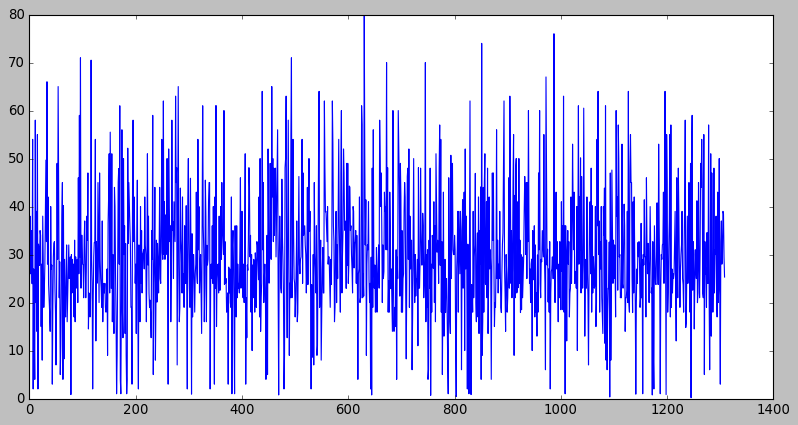

In [125]:
# your code here
plt.figure(figsize=(12,6))
titanic['Age'].plot()
mpl.style.use('classic')
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [45]:
import seaborn as sns

C:\Users\giusa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C:\Users\giusa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\giusa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\giusa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Age', ylabel='Density'>

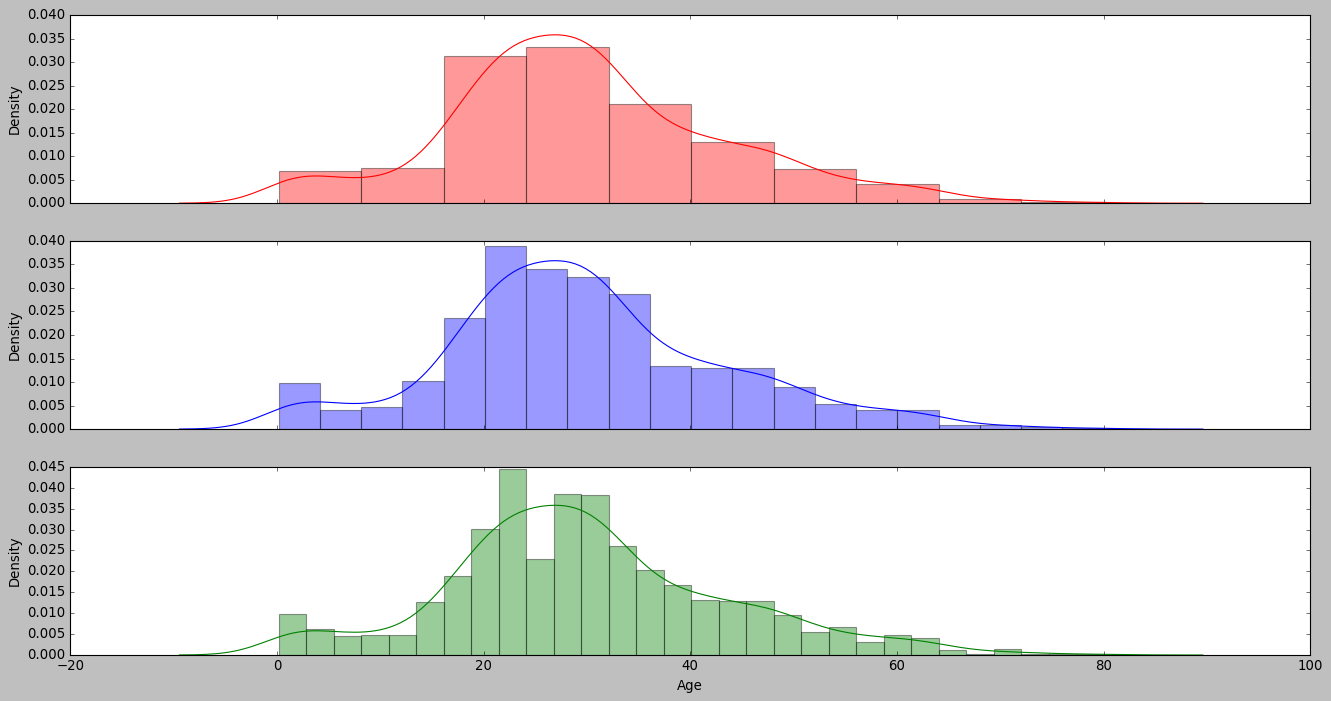

In [52]:
fig, axes = plt.subplots(3,1 ,sharex=True, figsize=(20,10))

sns.distplot(titanic['Age'], bins=10, ax=axes[0], color='r')
sns.distplot(titanic['Age'], bins=20, ax=axes[1], color='b')
sns.distplot(titanic['Age'], bins=30, ax=axes[2], color='g')

#could be done using histplot also, but distplot looks better

#### How does the bin size affect your plot?

In [ ]:
"""
By diving in bins we have a much more clear vision of the distribution.
It seems that most people had between 20 and 40 years old, and we have a bigger presence of small children comparing to people
over 60 years old. 
From that we might conclude that the boat population was mainly families with small children.
"""


#### Use seaborn to show the distribution of column `Age`.

C:\Users\giusa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

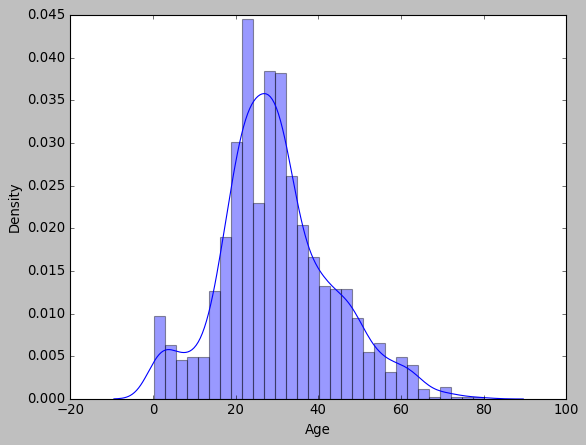

In [53]:
sns.distplot(titanic['Age'])


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [64]:
gender = titanic['Gender'].value_counts().head()
gender
gender = pd.DataFrame(gender).reset_index() 
gender

,index,Gender
0,male,843
1,female,466


In [66]:
graf_gender = gender.groupby("index").agg({"Gender":"sum"})
graf_gender

,Gender
index,
female,466
male,843


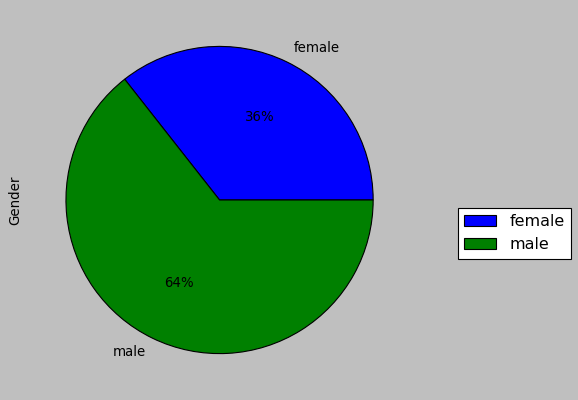

In [82]:
#Matplot
graf_gender.plot.pie(y='Gender',autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.1,0.5), loc="upper left")
plt.show()

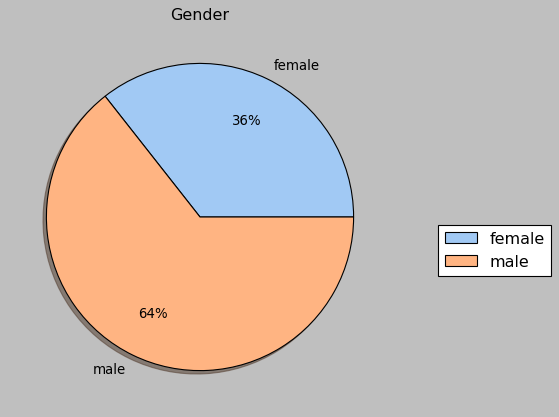

In [68]:
#Seaborn
colors = sns.color_palette('pastel')


graf_gender.groupby("index").agg({"Gender":"sum"}).plot(kind='pie', y='Gender', 
        autopct='%1.0f%%', pctdistance=.7,
          colors=colors, shadow=True).set_title("Gender")
plt.legend(bbox_to_anchor=(1.1,0.5), loc="upper left")
plt.ylabel("")
plt.show()

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:>

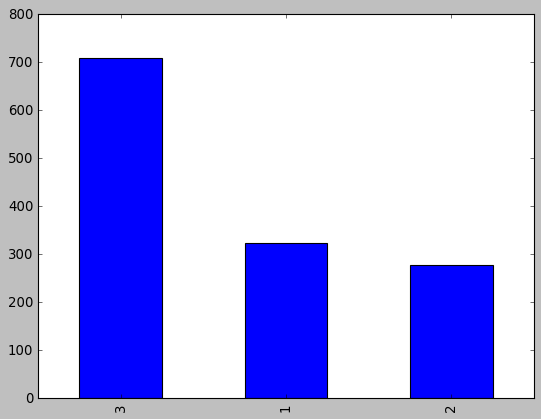

In [88]:
titanic['Pclass'].value_counts().plot.bar()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

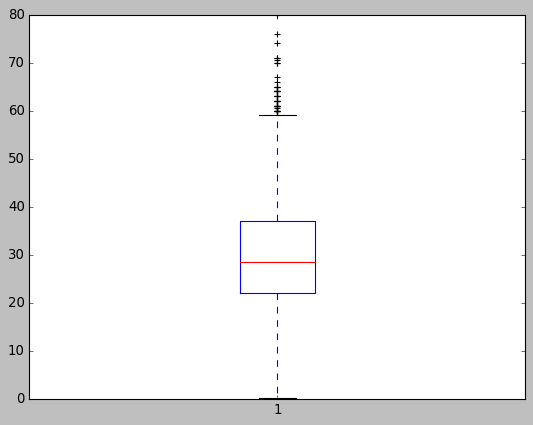

In [92]:
# your code here
plt.boxplot(titanic.Age)
plt.show()

In [ ]:
"""
Boxplot give a better idea about the center and spread of the distribution as well as any potential outliers that may exist. 
"""

#### What does the last plot tell you about the feature `Age`?

In [97]:
"""
The Age mean is close to 30 years old, and above 60 years old we have the outliers. 
"""

'\nThe Age mean is close to 30 years old, and above 60 years old we have the outliers. \n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

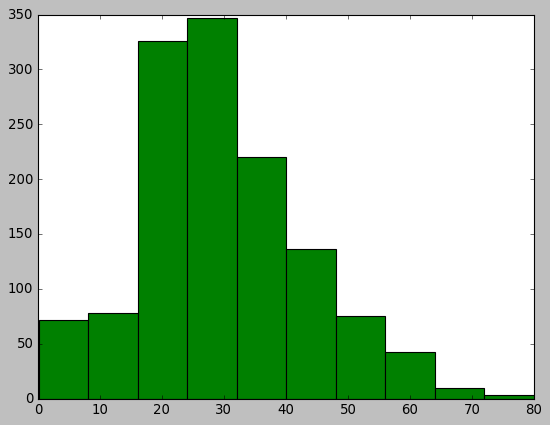

In [95]:
# your code here
plt.hist(titanic.Age, color='g')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [96]:
"""
The histogram allows to better visualize the distribution of Age.
"""

'\nThe histogram allows to better visualize the distribution of Age.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

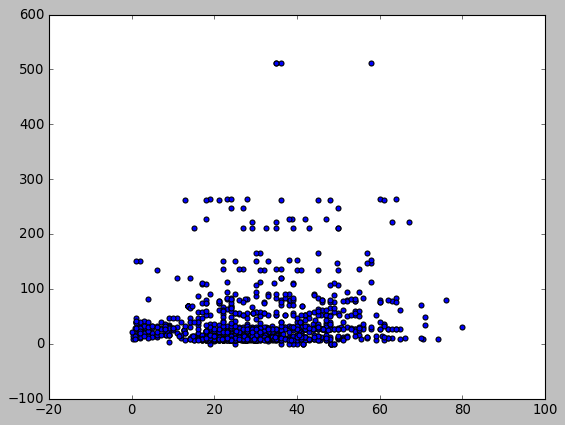

In [120]:
# Method 1 - matplotlib
plt.scatter(titanic.Age, titanic.Fare)
plt.show() 

<AxesSubplot:xlabel='Age', ylabel='Fare'>

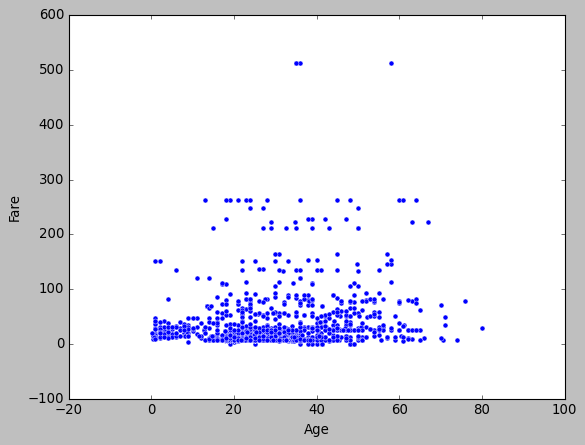

In [121]:
# Method 2 - seaborn
sns.scatterplot(data=titanic, x="Age", y="Fare")

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

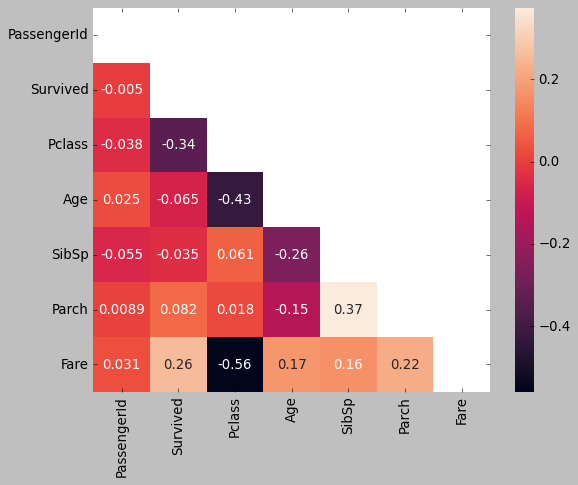

In [127]:
# your code here

matrix = np.triu(titanic.corr())

matrix = np.triu(titanic.corr()) 

sns.heatmap(titanic.corr(), annot= True, mask= matrix)

#### What are the most correlated features?

In [ ]:
"""
Parch and Fare, Parch and SibSp, Survived and Fare seems to be the most correlated features.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

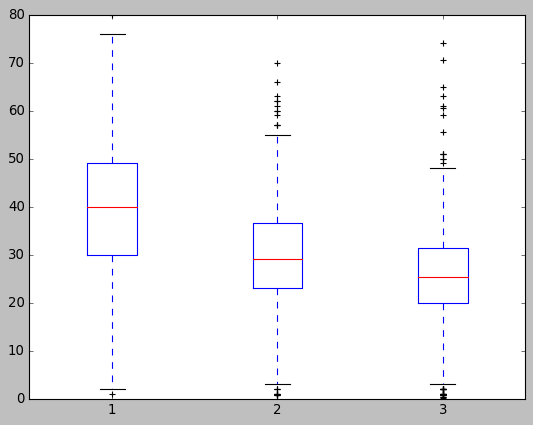

In [128]:
# your code here
plt.boxplot([titanic.loc[titanic['Pclass'] == 1, 'Age'], titanic.loc[titanic['Pclass'] == 2, 'Age'], titanic.loc[titanic['Pclass'] == 3, 'Age']])
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

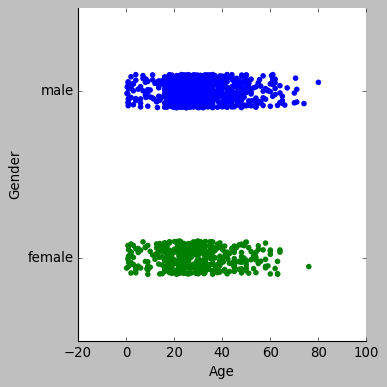

In [137]:
sns.catplot(x= 'Age', y= 'Gender', data= titanic)